In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import warnings
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier

%matplotlib inline
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('./data_preprocessed_over.csv')


In [3]:
df.head()

,성별코드,연령대코드,허리둘레,총콜레스테롤,트리글리세라이드,HDL콜레스테롤,LDL콜레스테롤,혈색소,요단백,혈청크레아티닌,AST,ALT,감마지티피,흡연상태,음주여부,복부비만,비만여부,고혈압,식전혈당
0,2.0,12.0,78.0,166.0,89.0,88.0,60.0,12.0,1.0,1.0,21.0,18.0,16.0,1.0,1.0,0.0,1.0,1.0,1
1,2.0,10.0,87.0,207.0,103.0,46.0,140.0,14.0,1.0,1.0,19.0,18.0,23.0,1.0,1.0,1.0,1.0,0.0,0
2,1.0,10.0,86.0,236.0,199.0,54.0,141.0,15.0,1.0,1.0,21.0,21.0,13.0,2.0,0.0,0.0,1.0,3.0,1
3,1.0,17.0,68.0,164.0,73.0,74.0,75.0,13.0,1.0,1.0,25.0,16.0,11.0,1.0,0.0,0.0,0.0,1.0,1
4,2.0,12.0,76.0,191.0,247.0,48.0,93.0,14.0,1.0,1.0,42.0,22.0,67.0,1.0,1.0,0.0,0.0,1.0,0


In [4]:
df["식전혈당"].value_counts()

2    924629
1    924629
0    924629
Name: 식전혈당, dtype: int64

# 데이터 분리 및 앙상블

In [5]:
target = df['식전혈당']
data = df.drop(['식전혈당'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.25, random_state=0, stratify=target)

In [6]:
rf_clf = RandomForestClassifier(random_state=0)
rf_clf.fit(X_train,y_train)
predict = rf_clf.predict(X_test)
accuracy = accuracy_score(y_test,predict)

print('random_forest accuracy :  {0:.4f}'.format(accuracy))

random_forest accuracy :  0.6894


# 하이퍼 파라미터 및 튜닝

In [9]:
from sklearn.model_selection import GridSearchCV

params = {
    'n_estimators':[100],
    'max_depth':[6,8,10,12],
    'min_samples_leaf':[8,12,18],
    'min_samples_split':[8,16,20]
}

rf_clf2 = RandomForestClassifier(random_state=0, n_jobs=-1)
grid_cv = GridSearchCV(rf_clf2,param_grid=params,cv=2,n_jobs=-1)
grid_cv.fit(X_train,y_train)


print('최적 하이퍼 파라미터:\n', grid_cv.best_params_)
print('최고 예측 정확도:{0:4f}'.format(grid_cv.best_score_))

최적 하이퍼 파라미터:
 {'max_depth': 12, 'min_samples_leaf': 8, 'min_samples_split': 20, 'n_estimators': 100}
최고 예측 정확도:0.563311


In [12]:
rf_clf3 = RandomForestClassifier(n_estimators=300,max_depth=12,min_samples_leaf=8,\
                                 min_samples_split=20,random_state=0)
rf_clf3.fit(X_train,y_train)


pred = rf_clf3.predict(X_test)


NameError: name 'y_train_test' is not defined

In [13]:
print("예측 정확도 :{0:4f}".format(accuracy_score(y_test,pred)))

예측 정확도 :0.563119


# 시각화

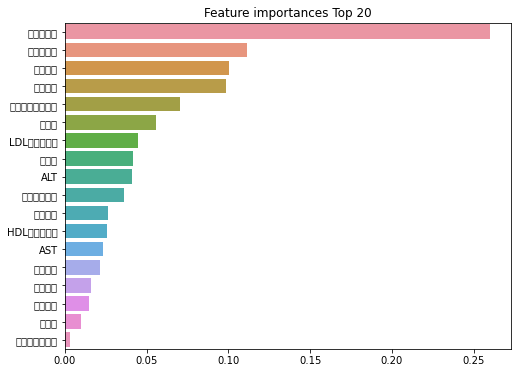

In [17]:
ftr_importances_values = rf_clf3.feature_importances_
ftr_importances = pd.Series(ftr_importances_values, index=X_train.columns)
ftr_top20 = ftr_importances.sort_values(ascending=False)[:20]


plt.figure(figsize=(8,6))
plt.title('Feature importances Top 20')
sns.barplot(x=ftr_top20, y = ftr_top20.index)
plt.show()